## 04 - Modelling

## Setting up Colab Environment if in Colab
The analyses outlined in this notebook relies on the estimators provided by the RAPIDS AI CUML library (https://docs.rapids.ai/api), which provides a sci-kit learn-like API for implementations of machine learning algorithms that are specifically configured to run on GPU hardware. Using this library will significantly speed up the computation time associated with the dimensionality reduction we conduct towards the end of this notebook.

As I do not personally have access to a GPU, the GPU-enabled part of this notebook is run on Google's Colab Notebook environment, which offers GPU access for free. In the cell belows below, we define the functions required to setup a 25GB RAM Colab Notebook Environment with the packages necessary for the code to function.

## Optional - Colab Setup

In [ ]:
def upgrade_runtime_ram():
    meminfo = subprocess.getoutput('cat /proc/meminfo').split('\n')

    memory_info = {entry.split(':')[0]: int(entry.split(':')[1].replace(' kB','').strip()) for entry in meminfo}

    if memory_info['MemTotal'] > 17000000:
        return

    a = []
    while(1):
        a.append('1')

In [ ]:
def restart_runtime():
    os.kill(os.getpid(), 9)

In [ ]:
def setup_rapids():
    pynvml.nvmlInit()
    handle = pynvml.nvmlDeviceGetHandleByIndex(0)
    device_name = pynvml.nvmlDeviceGetName(handle)
    if (device_name != b'Tesla T4') and (device_name != b'Tesla P4') and (device_name != b'Tesla P100-PCIE-16GB'):
        print("Wrong GPU - Restarting Runtime")
        restart_runtime()


    # clone RAPIDS AI rapidsai-csp-utils scripts repo
    !git clone https://github.com/rapidsai/rapidsai-csp-utils.git

    # install RAPIDS
    !bash rapidsai-csp-utils/colab/rapids-colab.sh 0.13


    # set necessary environment variables 
    dist_package_index = sys.path.index('/usr/local/lib/python3.6/dist-packages')
    sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.6/site-packages'] + sys.path[dist_package_index:]
    sys.path

    # update pyarrow & modules 
    exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals())

In [ ]:
def setup_conda():
    if not 'Miniconda3-4.5.4-Linux-x86_64.sh' in os.listdir():
        !wget https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh && bash Miniconda3-4.5.4-Linux-x86_64.sh -bfp /usr/local

    if not ('EPFL-Capstone-Project' in os.listdir()) and (os.getcwd().split('/')[-1] != 'EPFL-Capstone-Project'):
        !git clone https://github.com/helmigsimon/EPFL-Capstone-Project  
    if 'EPFL-Capstone-Project' in os.listdir():
        os.chdir('EPFL-Capstone-Project')

    !conda env create -f environment.yml
    !conda activate exts-ml

In [ ]:
def setup_drive():
    #Mounting Google Drive
    global drive
    from google.colab import drive
    drive.mount('/content/drive')

In [6]:
try:
    import sys,os,subprocess
    
    upgrade_runtime_ram()
    setup_drive()

    #Setting up PyPi Packages
    !pip install geopandas sparse-dot-topn pdpipe category-encoders catboost xgboost
    import geopandas as gpd
    import sparse_dot_topn.sparse_dot_topn as ct
    import pdpipe as pdp
    import category_encoders
    import xgboost as xgb

    #Setting up Conda Packages
    setup_conda()
    
    #Initializing NLTK
    import nltk
    nltk.download('stopwords')
    nltk.download('punkt')
    
    #Setting up RAPIDS AI
    import pynvml
    setup_rapids()
    
    from cuml import UMAP
    
except ModuleNotFoundError as e:
    print(e)
    print('Not in colab environment, continuing to run locally')
    from umap import UMAP

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Using cached geopandas-0.7.0-py2.py3-none-any.whl (928 kB)
Processing /root/.cache/pip/wheels/aa/e7/c7/e64559d518bcc12ed7e40a605ae304259b957ae8181c8d1e82/sparse_dot_topn-0.2.9-cp36-cp36m-linux_x86_64.whl
  Using cached pdpipe-0.0.49-py3-none-any.whl (48 kB)
  Using cached category_encoders-2.2.2-py2.py3-none-any.whl (80 kB)
  Using cached catboost-0.23.1-cp36-none-manylinux1_x86_64.whl (64.7 MB)
     |████████████████████████████████| 109.7 MB 2.8 kB/s 
  Using cached Fiona-1.8.13.post1-cp36-cp36m-manylinux1_x86_64.whl (14.7 MB)
  Using cached pyproj-2.6.1.post1-cp36-cp36m-manylinux2010_x86_64.whl (10.9 MB)
     |████████████████████████████████| 1.8 MB 41.8 MB/s 
     |████████████████████████████████| 2.1 MB 37.5 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
  Using cached strct-0.0.30-py2.py3-none-any.whl (16 kB)
  Using cached skutil-0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Solving environment: failed

ResolvePackageNotFound: 
  - sqlalchemy==1.3.13=py36h0b31af3_0
  - icu==64.2=h6de7cb9_1
  - libsodium==1.0.17=h01d97ff_0
  - libdap4==3.20.4=habf5908_0
  - tensorflow==1.12.0=mkl_py36h2b2bbaf_0
  - libxml2==2.9.10=h53d96d6_0
  - libgfortran==4.0.0=2
  - libwebp==1.0.2=hd3bf737_5
  - json-c==0.13.1=h1de35cc_1001
  - cfitsio==3.470=h84d2f63_2
  - tiledb==1.7.0=hd5e958f_2
  - libopenblas==0.3.9=h3d69b6c_0
  - tensorflow-base==1.12.0=mkl_py36h70e0e9a_0
  - libpng==1.6.37=hbbe82c9_1
  - pyrsistent==0.16.0=py36h37b9a7d_0
  - c-ares==1.15.0=h01d97ff_1001
  - zlib==1.2.11=h0b31af3_1006
  - libpq==12.2=h554dc5a_0
  - appnope==0.1.0=py36h9f0ad1d_1001
  - zstd==1.4.4=hed8d7c8_2
  - libprotobuf==3.11.4=hd174df1_0
  - fontconfig==2.13.1=h6b1039f_1001
  - kealib==1.4.12=h2324030_0
  - matplotlib-base==3.2.0=py36h11da6c2_1
  - hdf5==1.10.5=nompi_h3e39495_1104
  - poppler==0.67.0=h16886b5_8
  - pyzmq==19.0.0=py36h820b253_1
  - proj==6.3.1=h773a61f_1
  - geotiff==1.5.1=h4bd

## Imports

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split,  StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
tqdm.pandas()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, RobustScaler, MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [ ]:
from lib.transformers import *
from lib.pipelines import *
from lib.processing import save_to_pkl, load_from_pkl
from lib.visualization import GridSearchPlotter
from data.util.paths import DATA_PATH

In [ ]:
from category_encoders.leave_one_out import LeaveOneOutEncoder

In [ ]:
from cuml import LinearRegression, RandomForestRegressor, Ridge, Lasso

In [ ]:
from catboost import CatBoostRegressor

## Loading Data
First, we load the dataset that we have prepared in the previous notebook, ``03-DatasetPrep``

In [ ]:
metadata_df, image_embeddings_df = tuple(load_from_pkl(i,DATA_PATH) for i in ('metadata','image_embeddings'))
df = metadata_df.merge(image_embeddings_df,how='inner',on='release_id')
df = OutlierRemover(features=['number_of_tracks'] + [i for i in df.columns if 'umap' in i]).fit_transform(df[(df['running_time'] < 180) | (df['running_time'].isna())])

In [ ]:
del metadata_df, image_embeddings_df

In [15]:
col_set = {
    'format': {
        'description': 'format_description_', 
        'name': 'format_name_', 
        'text': ('format_text_clean'),
        'quantity': ('format_quantity')
    },
    'geography': {
        'superregion': 'superregion_',
        'region': 'region_',
        'country': 'country_'
    },
    'timeperiod': {
        'period': 'period_',
        'era': 'era_'
    },
    'genre': 'genre_',
    'style': 'style_',
    'null': None,
    'indicator': lambda x: x.max() == 1 and x.min() == 0,
    'image_embedding': 'image_umap_'
}
column_store = ColumnStore()
column_store.fit(df,col_set)

In [ ]:
df = df[df['year']>1949]
df = df[df[column_store._genre].sum(axis=1)==0]

## Preparing for Machine Learning
Next, we split our dataset, ``df``, into train and test sets, which is crucial for the training and ultimate evaluation of the machine learning models we will build in this notebook. We also apply an imputation of missing values for the ``average_rating`` feature at this stage. Since we are using the 'mean' strategy of imputation, it is crucial that this step is taken after the splitting of train and test datasets, in order to avoid datapoints from the test set influencing the values of predictors we are using to build our models.

In [1]:
X_tr, X_te, y_tr, y_te = train_test_split(df.drop('market_value',axis=1),df.market_value,random_state=0)

NameError: name 'train_test_split' is not defined

In [2]:
units_for_sale_imputer = SimpleImputer(strategy='constant',fill_value=0)
average_rating_imputer = SimpleImputer(strategy='mean')
running_time_imputer = RunningTimeImputer('running_time','number_of_tracks')

NameError: name 'SimpleImputer' is not defined

In [ ]:
X_tr['units_for_sale'] = units_for_sale_imputer.fit_transform(X_tr['units_for_sale'].values.reshape(-1,1))
X_te['units_for_sale'] = units_for_sale_imputer.transform(X_te['units_for_sale'].values.reshape(-1,1))

In [ ]:
X_tr['average_rating'] = average_rating_imputer.fit_transform(X_tr['average_rating'].values.reshape(-1,1))
X_te['average_rating'] = average_rating_imputer.transform(X_te['average_rating'].values.reshape(-1,1))

In [ ]:
X_tr = running_time_imputer.fit_transform(X_tr)
X_te = running_time_imputer.transform(X_te)

Finally, as we are dealing with a fairly high dimensional dataset, we create a smaller training dataset for the purposes of tuning the hyperparameters of the more sophisticated algorithms we are testing in this notebook. This will allow us to iterate quickly in the process of tuning our hyperparameters.

In [ ]:
df_sample = pd.concat([X_tr,y_tr],axis=1).sample(frac=0.1)
X_tr_sample = df_sample.drop('market_value',axis=1)
y_tr_sample = df_sample['market_value']

In [ ]:
del df

## Setting up Dummy Regression for baseline
In order to be able to interpret the results we obtain from our models, we must first set a benchmark which we expect our models to surpass. In our case, we will be employing the sci-kit learn DummyRegressor using the 'mean' strategy, and use this to calculate the baseline values for R2 and Mean Absolute Error, our evaluation of metrics of choice in this project.

In [ ]:
dummy_regressor = DummyRegressor(strategy='mean')
dummy_regressor.fit(X_tr,np.log(y_tr).values)
dummy_pred = dummy_regressor.predict(X_te)

First, we will naively evaluate the performance of our dummy regressor by calculating the R2 Score and Mean Absolute Error using our predictions and the log of the ``market_value`` feature of our test set. The results from this evaluation, as we can see below, indicate fairly strong results, particularly with respect to the Mean Absolute Error, but cannot be interpreted as one would normally interpret a Mean Absolute Error for a untransformed target feature. As we have log-linearized the target feature, the Mean Absolute Error in this case does not represent the mean difference in prediction we can expect from our model with respect to the actual value of the untransformed target variable, which we seek in this case in order to be able to interpret the quality of the model with respect how far it is from predicting the true price of a given Jazz album. To do so, we must exponentiate the predictions of our model and evaluate these with respect to the untransformed target feature values, which allows us to interpret the performance of the model in terms of mean deviation of the model from the actual album value using price as the denomination. This practice will be continued throughout this notebook, and will be key in evaluating whether or not our models can be said to be performant predictors of Jazz album value.

In [ ]:
r2_score(np.log(y_te),dummy_pred)

In [ ]:
mean_absolute_error(np.log(y_te),dummy_pred)

In [26]:
r2_score(y_te,np.exp(dummy_pred))

-0.07504973843038432

In [27]:
mean_absolute_error(y_te,np.exp(dummy_pred))

10.418513133902412

## Model Roadmap
In what follows, we will be attempting to predict the ``market_value`` of Jazz Album on the basis of their non-musical characteristics, using models built with the help of machine learning algorithms. For this analysis, we will be making use of the following machine learning algorithms to build our models:
- Linear Regression
- Ridge Regression
- Random Forest
- CatBoost

In so doing, we will also try to identify the difference in predictive power that a model built with full-information, or all available features, has in comparison to a model built only using those features that are ostensibly available for evaluation by patrons of record stores. As such, we will be building two models each to predict ``market_value`` using the machine learning algorithms identified above, in order to test whether the information that record store patrons lack significantly inhibits their ability to make a prediction of the ``market_value`` of a given Jazz album.

## Linear Regression
For our first pair of models, we will use Linear Regression. Linear Regression is a simple model which lends itself well to quickly establishing a non-dummy baseline to better understand the possible performance of our final and preferred model. The ``cuml`` implementation of this estimator has few hyperparameters to tune, and is quick to build.

## Linear Regression - Record Store
To build and evaluate our Linear Regression model for the 'Record Store' scenario, we will create a pipeline which applies the transformations necessary to prepare the dataset for the application of this algorithm.

The processing pipeline follows the following steps:
1. Encoding categorical features with high cardinality using Leave One Out Encoding
    - In order to be able to benefit from the information encoded within the categorical features of ``artist``, ``label``, ``format_text``, ``format_name`` and ``master_id``, we make use of Leave One Out Encoding
    - This approach to categorical feature encoding is beneficial for the purposes of this project as it helps keep the dimensionality of our dataset from exploding via similar techniques such as OneHotEncoding, while still being able to exploit the relationship between the given feature and the target variable
    - Leave One Out Encoding effectively does so by calculating the mean of the target feature for all the records containing a given value for each categorical feature being encoded.
2. Removing Unnecessary/Inappropriate Columns
    - As has been outlined previously, in this step of our analysis, we aim to predict the ``market_value`` of a given Jazz album using only those non-musical attributes which are ostensibly available for evaluation by record store patrons
    - As such, we remove those features pertaining to the Full Information scenario, as well as non-encoded features that will not be leveraged for estimation, such as 'track_titles' and 'thumb_url'
3. Encoding of ``year``
    - Following best practices, we one hot encode the ``year`` feature, in order to reinforce its status as a categorical, not numerical feature.
4. Standardization
    - Following best practices, we standardize the features use for predicting ``market_value``
5. Normalization
    - In order to speed up training time and mitigate the impact of scale differences on our results, we normalize the range of our features to lie between 0 and 1

Finally, we construct the ``record_store_lr_pipe``, which applies the aforementioned transformation pipeline and the Linear Regression algorithm we have discussed previously. As the ``cuml`` implementation offers no relevant hyperparametesr to tune, we make use of the estimator as is. The use of GridSearch in the estimator is superfluous in this instance, as we are not searching over a hyperparameter space, but is useful for the natively supported cross validation, which we use to get an understanding of the performance of our model.

In [3]:
record_store_regression_removal_columns = set([
    'market_price','units_for_sale','have','want','average_rating','rating_count','last_sold','lowest','median',
    'highest','track_titles','country','genre','style','community_have','community_want','formats','thumb_url',
    'release_url','format_description','days_since_last_sale','title', 'release_id'
])

record_store_regression_processing = Pipeline([
    ('leave_one_out_encoding', LeaveOneOutEncoder(cols=['artist','label','format_text','master_id','format_name'])),
    ('record_store_column_remover', ColumnRemover(record_store_regression_removal_columns)),
    ('preprocessing',record_store_regression_transformer),
    ('scaler', RobustScaler()),
    ('normalize', MinMaxScaler())                        
])

record_store_lr_pipe = Pipeline([
    ('processing', record_store_regression_processing),
    ('lr', GridSearchCV(
        LinearRegression(),
        param_grid={
            'normalize': [False]
        },
        cv=KFold(n_splits=5,shuffle=True),
        scoring='neg_mean_absolute_error',
        verbose=5,
        n_jobs=-1,
    ))
])

NameError: name 'ColumnTransformer' is not defined

In [32]:
record_store_lr_pipe.fit(X_tr,np.log(y_tr).values)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   15.8s remaining:   10.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.6s finished
/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


Pipeline(memory=None,
         steps=[('processing',
                 Pipeline(memory=None,
                          steps=[('running_time_imputer',
                                  RunningTimeImputer(number_of_tracks='number_of_tracks',
                                                     running_time='running_time')),
                                 ('leave_one_out_encoding',
                                  LeaveOneOutEncoder(cols=['artist', 'label',
                                                           'format_text',
                                                           'master_id',
                                                           'format_name'],
                                                     drop_invariant=False,
                                                     handle_missing='value',
                                                     handle_unknown='va...
                              estimator=LinearRegression(algorithm='eig', fit_intercept=Tr

In [33]:
record_store_lr_pipe.steps[-1][-1].best_score_

-0.520049832102794

After performing grid search, we see that our model performs better than our baseline in terms of its negative mean absolute error, which we will now evaluate against the test set by exponentiating our model predictions in order to obtain a clearer picture of the scale of its error.

In [34]:
record_store_lr_pred = record_store_lr_pipe.predict(X_te)

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


In [35]:
r2_score(y_te,np.exp(record_store_lr_pred))

0.20382318307613334

In [36]:
mean_absolute_error(y_te,np.exp(record_store_lr_pred))

8.221763449209202

In comparison to our baseline model, we see there has been a clear improvement in performance using the Linear Regression model, with the R2 venturing into positive territory and the mean absolute error decreasing by just over 2.5 USD. However, despite this improvement in performance, the linear regression model cannot be argued to be a reliable model in the prediction of Jazz album market value, with a very large deviation from the price of a given record and an altogether poor evaluation of its fit as per the R2. 

As a next step, we will investigate whether the inclusion of the Full Information suite of features will do anything to improve model performance for this algorithm.

## Linear Regression - Full Information
In comparison to the previous model, we make only a small change to the pipeline that builds the Linear Regression model for the Full Information scenario. By retaining the features of ``unit_for_sale``, ``community_have``, ``community_want``, ``average_rating`` and ``rating_count``, we incorporate the broader scope of information available to us by using the Discogs.com platform information. In what follows, we attempt to identify whether this makes a substantive difference in the prediction of the ``market_value`` target feature for Jazz albums within the Linear Regression framework.

In [ ]:
full_information_regression_transformer = ColumnTransformer(transformers=[
    ('year_encoder', OneHotEncoder(dtype=np.uint8,handle_unknown='ignore'), ['year'])
], remainder='passthrough')

full_information_columns = set([
    'units_for_sale','community_have','community_want','average_rating','rating_count'
])
full_information_regression_removal_columns = record_store_regression_removal_columns - full_information_columns

full_information_regression_processing = Pipeline([
    ('leave_one_out_encoding', LeaveOneOutEncoder(cols=['artist','label','format_text','master_id','format_name'])),
    ('record_store_column_remover', ColumnRemover(full_information_regression_removal_columns)),
    ('preprocessing',full_information_regression_transformer),
    ('scaler', RobustScaler()),
    ('normalize',MinMaxScaler())
])

full_information_lr_pipe = Pipeline([
    ('processing', full_information_regression_processing),
    ('lr', GridSearchCV(
        LinearRegression(),
        param_grid={
            'normalize':[False,True]
        },
        cv=KFold(n_splits=5,shuffle=True),
        scoring='neg_mean_absolute_error',
        verbose=5,
        n_jobs=-1,
    ))
])

In [40]:
full_information_lr_pipe.fit(X_tr,np.log(y_tr).values)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   11.2s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.4s finished
/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


Pipeline(memory=None,
         steps=[('processing',
                 Pipeline(memory=None,
                          steps=[('running_time_imputer',
                                  RunningTimeImputer(number_of_tracks='number_of_tracks',
                                                     running_time='running_time')),
                                 ('leave_one_out_encoding',
                                  LeaveOneOutEncoder(cols=['artist', 'label',
                                                           'format_text',
                                                           'master_id',
                                                           'format_name'],
                                                     drop_invariant=False,
                                                     handle_missing='value',
                                                     handle_unknown='va...
                              estimator=LinearRegression(algorithm='eig', fit_intercept=Tr

In [41]:
full_information_lr_pipe['lr'].best_score_

-0.47978700167755567

Compared to the results we obtained on the cross validation of the Linear Regression model under the Record Store scenario, we observe a small increase of around 0.05 in the negative mean absolute error. Next we will identify to what extent this improvement is reflected by evaluating our model on the test set.

In [42]:
full_information_lr_pred = record_store_lr_pipe.predict(X_te)

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


In [43]:
r2_score(y_te,np.exp(full_information_lr_pred))

0.20382318307613334

In [44]:
mean_absolute_error(y_te,np.exp(full_information_lr_pred))

8.221763449209202

Comparing the results of the Record Store and Full Information scenarios, we see no improvement in the performance of the model on the held out test set, as the scores maintain the same values in each case.

## Ridge Regression
The next algorithm we will consider in our attempt to predict the ``market_value`` of Jazz albums is the Ridge Regression. It is an offshoot algorithm of Linear Regression, differentiating itself by making use of L2 Regularization as a means of avoiding overfitting. Ridge Regression is often used as an alternative to Linear Regression, and is generally associated with stronger performances.

## Ridge Regression - Record Store
As Ridge Regression operates under the same constraints as Linear Regression, we can make use of the previously defined ``record_store_regression_processing`` pipeline in creating our Ridge Regression training and evaluation pipeline. In this case, we simply replace the Linear Regression in our GridSearchCV step with Ridge Regression, but now also search over the space of the ``alpha`` hyperparameter, which controls the regularization strength of the Ridge Regression algorithm.

In [ ]:
record_store_ridge_pipe = Pipeline([
    ('processing', record_store_regression_processing)
    ('ridge', GridSearchCV(
        Ridge(normalize=False,solver='eig'),
        param_grid={
            'alpha': np.linspace(1e-20,1e-1,10),
        },
        cv=KFold(n_splits=5,shuffle=True),
        scoring='neg_mean_absolute_error',
        verbose=5,
        n_jobs=-1,
        return_train_score=True
    ))
])

In [156]:
record_store_ridge_pipe.fit(X_tr,np.log(y_tr).values)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   22.7s finished
/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


Pipeline(memory=None,
         steps=[('running_time_imputer',
                 RunningTimeImputer(number_of_tracks='number_of_tracks',
                                    running_time='running_time')),
                ('leave_one_out_encoding',
                 LeaveOneOutEncoder(cols=['artist', 'label', 'format_text',
                                          'format_name', 'master_id'],
                                    drop_invariant=False,
                                    handle_missing='value',
                                    handle_unknown='value', random_state=None,
                                    return_df=True, sigm...
                              estimator=Ridge(alpha=1.0, solver='eig', fit_intercept=True, normalize=False, handle=<cuml.common.handle.Handle object at 0x7faa992d4950>, output_type='input'),
                              iid='deprecated', n_jobs=-1,
                              param_grid={'alpha': array([1.00000000e-20, 1.11111111e-02, 2.22222222

In [ ]:
plotter = GridSearchPlotter(record_store_ridge_pipe['ridge'])

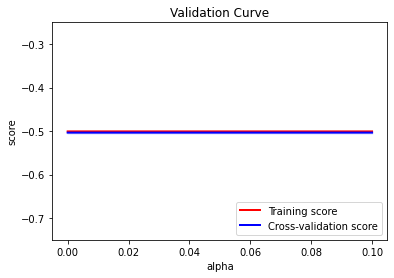

In [158]:
plotter.plot_validation_curve(parameter='alpha',ylim=(-0.75,-0.25))

In [159]:
record_store_ridge_pipe['ridge'].best_score_

-0.5035058857221621

In [160]:
record_store_ridge_pipe['ridge'].best_params_

{'alpha': 0.1}

In [161]:
record_store_ridge_pred = record_store_ridge_pipe.predict(X_te)

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


In [162]:
r2_score(y_te,np.exp(record_store_ridge_pred))

0.20449145454034268

In [163]:
mean_absolute_error(y_te,np.exp(record_store_ridge_pred))

8.218258459392512

## Ridge - Full Information

In [ ]:
full_information_ridge_pipe = Pipeline([
    ('leave_one_out_encoding', LeaveOneOutEncoder(cols=['artist','label','format_text','format_name','master_id'])),
    ('record_store_column_remover', ColumnRemover(full_information_regression_removal_columns)),
    ('preprocessing',full_information_regression_transformer),
    ('scaler', StandardScaler()),
    ('normalization', MinMaxScaler()),
    ('ridge', GridSearchCV(
        Ridge(normalize=False,solver='eig'),
        param_grid={
            'alpha': np.logspace(-3,3,10),
        },
        cv=KFold(n_splits=5,shuffle=True),
        scoring='neg_mean_absolute_error',
        verbose=5,
        n_jobs=-1,
        return_train_score=True
    ))
])

In [55]:
full_information_ridge_pipe.fit(X_tr,np.log(y_tr).values)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   22.5s finished
/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


Pipeline(memory=None,
         steps=[('running_time_imputer',
                 RunningTimeImputer(number_of_tracks='number_of_tracks',
                                    running_time='running_time')),
                ('leave_one_out_encoding',
                 LeaveOneOutEncoder(cols=['artist', 'label', 'format_text',
                                          'format_name', 'master_id'],
                                    drop_invariant=False,
                                    handle_missing='value',
                                    handle_unknown='value', random_state=None,
                                    return_df=True, sigm...
                              estimator=Ridge(alpha=1.0, solver='eig', fit_intercept=True, normalize=False, handle=<cuml.common.handle.Handle object at 0x7faa93626fb0>, output_type='input'),
                              iid='deprecated', n_jobs=-1,
                              param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469

In [ ]:
plotter = GridSearchPlotter(full_information_ridge_pipe['ridge'])

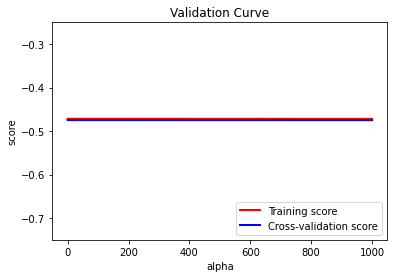

In [57]:
plotter.plot_validation_curve(parameter='alpha',ylim=(-0.75,-0.25))

In [58]:
full_information_ridge_pipe['ridge'].best_score_

-0.4744432855195089

In [59]:
full_information_ridge_pipe['ridge'].best_params_

{'alpha': 215.44346900318823}

In [60]:
full_information_ridge_pred = full_information_ridge_pipe.predict(X_te)

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


In [61]:
r2_score(y_te,np.exp(full_information_ridge_pred))

-7.469775953696709

In [62]:
mean_absolute_error(y_te,np.exp(full_information_ridge_pred))

8.13795304967769

## Random Forest - Record Store

In [ ]:
record_store_random_forest_removal_columns = [
    'market_price','units_for_sale','have','want','average_rating','rating_count','last_sold','lowest','median',
    'highest','track_titles','country','genre','style','community_have','community_want','formats','thumb_url',
    'release_url','format_description','days_since_last_sale','title','release_id'
]
record_store_random_forest_removal_columns.extend(
    column_store._indicator
)
record_store_random_forest_removal_columns = set(record_store_random_forest_removal_columns)

In [ ]:
record_store_random_forest_preprocessing_pipe = Pipeline([
    ('leave_one_out_encoding', LeaveOneOutEncoder(cols=['artist','label','format_text','format_name','master_id','year','country'])),
    ('reduce_indicators', IndicatorReducer(indicators=column_store._indicator,algorithm=PCA,components=40)),
    ('record_store_column_remover', ColumnRemover(record_store_random_forest_removal_columns)),
    ('robust_scaler', RobustScaler()),
    ('normalization', MinMaxScaler()),
    ('cast_to_32', FunctionTransformer(func=lambda x: x.astype(np.float32)))
])

random_forest = RandomForestRegressor()

record_store_random_forest_search_pipe = Pipeline([
    ('preprocessing',record_store_random_forest_preprocessing_pipe),
    ('grid_search', GridSearchCV(
        random_forest,
        cv=KFold(n_splits=5,shuffle=True),
        param_grid={
            'n_estimators': np.linspace(10,200,5).astype(int)
        },
        verbose=50,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        return_train_score=True
    ))
])

record_store_random_forest_pipe = Pipeline([
    ('preprocessing',record_store_random_forest_preprocessing_pipe),
    ('random_forest',random_forest)
])

In [169]:
record_store_random_forest_search_pipe.fit(X_tr_sample,np.log(y_tr_sample).values.astype(np.float32))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   45

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.4min remaining:   25.8s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  1.8min remaining:   27.4s
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  2.0min remaining:   22.9s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:  2.1min remaining:   17.1s
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:  2.2min remaining:   11.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.4min finished


/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('running_time_imputer',
                                  RunningTimeImputer(number_of_tracks='number_of_tracks',
                                                     running_time='running_time')),
                                 ('leave_one_out_encoding',
                                  LeaveOneOutEncoder(cols=['artist', 'label',
                                                           'format_text',
                                                           'format_name',
                                                           'master_id', 'year',
                                                           'country'],
                                                     drop_invariant=False,
                                                     handle_missing='value...
                              estimator=RandomForestRegressor(n_estimators=100, max

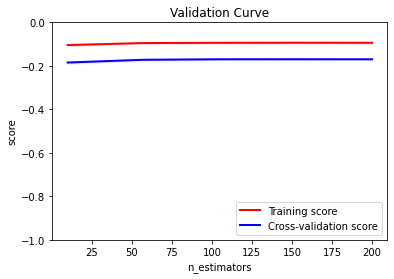

In [170]:
record_store_random_forest_plotter = GridSearchPlotter(record_store_random_forest_search_pipe.steps[-1][1])
record_store_random_forest_plotter.plot_validation_curve(parameter='n_estimators',ylim=(-1,0))

In [171]:
record_store_random_forest_search_pipe.steps[-1][1].best_score_

-0.1692010998725891

In [172]:
record_store_random_forest_search_pipe.steps[-1][1].best_params_

{'n_estimators': 152}

In [173]:
record_store_random_forest_pipe.fit(X_tr,np.log(y_tr).values.astype(np.float32))

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('running_time_imputer',
                                  RunningTimeImputer(number_of_tracks='number_of_tracks',
                                                     running_time='running_time')),
                                 ('leave_one_out_encoding',
                                  LeaveOneOutEncoder(cols=['artist', 'label',
                                                           'format_text',
                                                           'format_name',
                                                           'master_id', 'year',
                                                           'country'],
                                                     drop_invariant=False,
                                                     handle_missing='value...
                 RandomForestRegressor(n_estimators=100, max_depth=16, handle=<cuml

In [174]:
record_store_random_forest_te_pred = record_store_random_forest_pipe.predict(X_te)

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected row ('C') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


In [177]:
r2_score(y_te,np.exp(record_store_random_forest_te_pred))

-0.10311887111913931

In [178]:
mean_absolute_error(y_te,np.exp(record_store_random_forest_te_pred))

10.448137215461019

## Random Forest - Full Information

In [ ]:
full_information_random_forest_removal_columns = record_store_random_forest_removal_columns - full_information_columns

In [28]:
full_information_random_forest_preprocessing_pipe = Pipeline([
    ('leave_one_out_encoding', LeaveOneOutEncoder(cols=['artist','label','format_text','format_name','master_id','year','country'])),
    #('reduce_indicators', IndicatorReducer(indicators=column_store._indicator,algorithm=PCA,components=40)),
    ('record_store_column_remover', ColumnRemover(full_information_random_forest_removal_columns)),
    ('cast_to_32', FunctionTransformer(func=lambda x: x.astype(np.float32).values))
])

full_information_random_forest_search_pipe = Pipeline([
    ('preprocessing',full_information_random_forest_preprocessing_pipe),
    ('grid_search', GridSearchCV(
        random_forest,
        cv=KFold(n_splits=5,shuffle=True),
        param_grid={
            'n_estimators': np.linspace(10,200,5).astype(int)
        },
        verbose=50,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        return_train_score=True
    ))
])

full_information_random_forest_pipe = Pipeline([
    ('preprocessing',full_information_random_forest_preprocessing_pipe),
    ('random_forest',random_forest)
])

NameError: ignored

In [29]:
full_information_random_forest_search_pipe.fit(X_tr_sample,np.log(y_tr_sample).values.astype(np.float32))

NameError: ignored

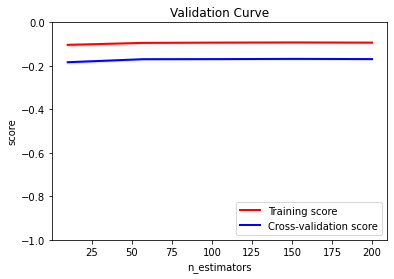

In [76]:
full_information_random_forest_plotter = GridSearchPlotter(full_information_random_forest_search_pipe.steps[-1][1])
full_information_random_forest_plotter.plot_validation_curve(parameter='n_estimators',ylim=(-1,0))

In [77]:
full_information_random_forest_search_pipe.steps[-1][1].best_score_

-0.16753565669059753

In [78]:
full_information_random_forest_search_pipe.steps[-1][1].best_params_

{'n_estimators': 152}

In [79]:
full_information_random_forest_pipe.fit(X_tr,np.log(y_tr).values.astype(np.float32))

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('running_time_imputer',
                                  RunningTimeImputer(number_of_tracks='number_of_tracks',
                                                     running_time='running_time')),
                                 ('leave_one_out_encoding',
                                  LeaveOneOutEncoder(cols=['artist', 'label',
                                                           'format_text',
                                                           'format_name',
                                                           'master_id',
                                                           'year'],
                                                     drop_invariant=False,
                                                     handle_missing='value',
                                                     handle_u...
                 RandomForestR

In [80]:
full_information_random_forest_te_pred = full_information_random_forest_pipe.predict(X_te)

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected row ('C') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


In [81]:
r2_score(y_te,np.exp(full_information_random_forest_te_pred))

-0.10182890895470176

In [82]:
mean_absolute_error(y_te,np.exp(full_information_random_forest_te_pred))

10.437374548180669

## XGBoost - Record Store

In [ ]:
xgboost = xgb.XGBRegressor(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    verbosity=5,
    objective='reg:linear',
    booster='gbtree',
    gamma=0,
    random_state=0,
    tree_method='gpu_hist',
)
record_store_xgb_grid_pipe = Pipeline([
    ('processing', record_store_regression_processing),
    ('lr', GridSearchCV(
        xgb.XGBRegressor(),
        param_grid={
            'max_depth': np.linspace(3,20,5).astype(int)
        },
        cv=KFold(n_splits=5,shuffle=True),
        scoring='neg_mean_absolute_error',
        verbose=5,
        n_jobs=-1,
        return_train_score=True
    ))
])

In [50]:
record_store_xgb_grid_pipe.fit(X_tr_sample,np.log(y_tr_sample))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  9.6min finished


[09:07:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('processing',
                 Pipeline(memory=None,
                          steps=[('running_time_imputer',
                                  RunningTimeImputer(number_of_tracks='number_of_tracks',
                                                     running_time='running_time')),
                                 ('leave_one_out_encoding',
                                  LeaveOneOutEncoder(cols=['artist', 'label',
                                                           'format_text',
                                                           'master_id',
                                                           'format_name'],
                                                     drop_invariant=False,
                                                     handle_missing='value',
                                                     handle_unknown='va...
                                                     n_estimators=100, n_jobs=1,
         

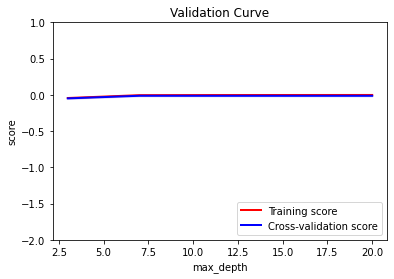

In [51]:
record_store_xgb_plot = GridSearchPlotter(record_store_xgb_grid_pipe.steps[-1][1])
record_store_xgb_plot.plot_validation_curve(parameter='max_depth',ylim=(-2,1))

In [52]:
record_store_xgb_grid_pipe.steps[-1][1].best_score_

-0.011496590106207173

In [53]:
record_store_xgb_grid_pipe.steps[-1][1].best_params_

{'max_depth': 7}

In [ ]:
record_store_xgb_te_pred = record_store_xgb_pipe.predict(X_te)

In [55]:
r2_score(y_te,np.exp(record_store_xgb_te_pred))

-0.07203988754811963

In [56]:
mean_absolute_error(y_te,np.exp(record_store_xgb_te_pred))

10.193350589602566

## Catboost - Record Store

In [ ]:
record_store_catboost_removal_columns = set([
    'market_price','units_for_sale','have','want','average_rating','rating_count','last_sold','lowest','median',
    'highest','track_titles','genre','style','community_have','community_want','formats','thumb_url',
    'release_url','format_description','days_since_last_sale','title','release_id'
])
record_store_catboost_removal_columns = record_store_catboost_removal_columns.union(column_store._geography_country)

In [ ]:
record_store_catboost_processing_pipe = Pipeline([
    ('record_store_column_remover', ColumnRemover(record_store_catboost_removal_columns)),
])

catboost = CatBoostRegressor(
    random_seed=0,
    cat_features=['year','format_text','master_id','format_name','artist','label','country'],
    boosting_type='Ordered',
    n_estimators=100,
    learning_rate=0.1,
    l2_leaf_reg=3,
    border_count=170,
    max_depth=10,
)

record_store_catboost_grid_pipe = Pipeline([
    ('processing', record_store_catboost_processing_pipe),
    ('grid_search', GridSearchCV(
        catboost,
        param_grid={
            #'learning_rate': np.logspace(-3,1,5),
            #'border_count': np.linspace(1,200,5),
            'l2_leaf_reg': [1,3,5,8],
        },
        n_jobs=-1,
        cv=KFold(n_splits=5,shuffle=True),
        verbose=1,
        scoring='neg_mean_absolute_error',
        return_train_score=True)
    )
])

record_store_catboost_pipe = Pipeline([
    ('processing', record_store_catboost_processing_pipe),
    ('catboost',catboost)
])

In [85]:
record_store_catboost_grid_pipe.fit(X_tr_sample,np.log(y_tr_sample))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.2min finished


0:	learn: 0.8435499	total: 294ms	remaining: 29.2s
1:	learn: 0.8257147	total: 493ms	remaining: 24.2s
2:	learn: 0.8096158	total: 696ms	remaining: 22.5s
3:	learn: 0.7954620	total: 892ms	remaining: 21.4s
4:	learn: 0.7841133	total: 950ms	remaining: 18s
5:	learn: 0.7732846	total: 1.15s	remaining: 18s
6:	learn: 0.7630579	total: 1.35s	remaining: 18s
7:	learn: 0.7557761	total: 1.55s	remaining: 17.9s
8:	learn: 0.7476804	total: 1.75s	remaining: 17.7s
9:	learn: 0.7396376	total: 1.95s	remaining: 17.5s
10:	learn: 0.7324130	total: 2.15s	remaining: 17.4s
11:	learn: 0.7275638	total: 2.17s	remaining: 15.9s
12:	learn: 0.7229593	total: 2.26s	remaining: 15.1s
13:	learn: 0.7193264	total: 2.46s	remaining: 15.1s
14:	learn: 0.7158377	total: 2.66s	remaining: 15.1s
15:	learn: 0.7121851	total: 2.85s	remaining: 15s
16:	learn: 0.7092309	total: 3.05s	remaining: 14.9s
17:	learn: 0.7061470	total: 3.24s	remaining: 14.8s
18:	learn: 0.7041067	total: 3.34s	remaining: 14.2s
19:	learn: 0.7023871	total: 3.39s	remaining: 13.6

Pipeline(memory=None,
         steps=[('processing',
                 Pipeline(memory=None,
                          steps=[('running_time_imputer',
                                  RunningTimeImputer(number_of_tracks='number_of_tracks',
                                                     running_time='running_time')),
                                 ('record_store_column_remover',
                                  ColumnRemover(cols_to_remove={'average_rating',
                                                                'community_have',
                                                                'community_want',
                                                                'country_albania',
                                                                'country_algeria',
                                                                'country_andorra',
                                                                'coun...
                          verbose=False)),


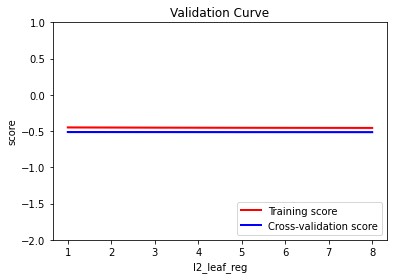

In [86]:
record_store_catboost_plot = GridSearchPlotter(record_store_catboost_grid_pipe.steps[-1][1])
record_store_catboost_plot.plot_validation_curve(parameter='l2_leaf_reg',ylim=(-2,1))

In [87]:
record_store_catboost_grid_pipe.steps[-1][1].best_score_

-0.5113422342300346

In [88]:
record_store_catboost_grid_pipe.steps[-1][1].best_params_

{'l2_leaf_reg': 1}

In [89]:
record_store_catboost_pipe.fit(X_tr,np.log(y_tr))

0:	learn: 0.8427669	total: 591ms	remaining: 58.5s
1:	learn: 0.8210181	total: 1.09s	remaining: 53.7s
2:	learn: 0.8030254	total: 1.6s	remaining: 51.6s
3:	learn: 0.7877739	total: 2.1s	remaining: 50.4s
4:	learn: 0.7719954	total: 2.6s	remaining: 49.3s
5:	learn: 0.7585067	total: 3.09s	remaining: 48.4s
6:	learn: 0.7465543	total: 3.6s	remaining: 47.8s
7:	learn: 0.7364661	total: 4.1s	remaining: 47.2s
8:	learn: 0.7276324	total: 4.61s	remaining: 46.6s
9:	learn: 0.7204550	total: 5.12s	remaining: 46s
10:	learn: 0.7136106	total: 5.62s	remaining: 45.5s
11:	learn: 0.7083812	total: 6.13s	remaining: 45s
12:	learn: 0.7036820	total: 6.63s	remaining: 44.4s
13:	learn: 0.6993458	total: 7.14s	remaining: 43.9s
14:	learn: 0.6928528	total: 7.64s	remaining: 43.3s
15:	learn: 0.6871808	total: 8.13s	remaining: 42.7s
16:	learn: 0.6823513	total: 8.63s	remaining: 42.2s
17:	learn: 0.6782538	total: 9.13s	remaining: 41.6s
18:	learn: 0.6747978	total: 9.62s	remaining: 41s
19:	learn: 0.6721154	total: 10.1s	remaining: 40.5s
2

Pipeline(memory=None,
         steps=[('processing',
                 Pipeline(memory=None,
                          steps=[('running_time_imputer',
                                  RunningTimeImputer(number_of_tracks='number_of_tracks',
                                                     running_time='running_time')),
                                 ('record_store_column_remover',
                                  ColumnRemover(cols_to_remove={'average_rating',
                                                                'community_have',
                                                                'community_want',
                                                                'country_albania',
                                                                'country_algeria',
                                                                'country_andorra',
                                                                'coun...
                                           

In [ ]:
record_store_catboost_te_pred = record_store_catboost_pipe.predict(X_te)

In [91]:
r2_score(y_te,np.exp(record_store_catboost_te_pred))

0.27608996817980935

In [92]:
mean_absolute_error(y_te,np.exp(record_store_catboost_te_pred))

7.788725056722764

## CatBoost - Full Information

In [ ]:
full_information_catboost_removal_columns = record_store_catboost_removal_columns - full_information_columns

In [ ]:
full_information_catboost_processing_pipe = Pipeline([
    ('record_store_column_remover', ColumnRemover(full_information_catboost_removal_columns)),
])

full_information_catboost_grid_pipe = Pipeline([
    ('processing', full_information_catboost_processing_pipe),
    ('grid_search', GridSearchCV(
        catboost,
        param_grid={            
            #'learning_rate': np.logspace(-3,1,5),
            #'border_count': np.linspace(1,200,5),
            'l2_leaf_reg': [1,3,5,8],
        },
        n_jobs=3,
        cv=KFold(n_splits=5,shuffle=True),
        scoring='neg_mean_absolute_error',
        verbose=50,
        return_train_score=True)
    )
])

full_information_catboost_pipe = Pipeline([
    ('processing', full_information_catboost_processing_pipe),
    ('catboost',catboost)
])

In [67]:
full_information_catboost_grid_pipe.fit(X_tr_sample,np.log(y_tr_sample).values)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   46.4s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:   47.2s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:   51.5s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:  1.6min


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:  1.6min
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:  1.7min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  2.5min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:  2.5min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:  2.6min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:  3.4min
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:  3.4min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  3.4min
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:  4.2min
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:  4.4min
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed:  4.4min
[Parallel(n_jobs=3)]: Done  16 out of  20 | elapsed:  5.1min remaining:  1.3min
[Parallel(n_jobs=3)]: Done  17 out of  20 | elapsed:  5.2min remaining:   54.5s
[Parallel(n_jobs=3)]: Done  18 out of  20 | elapsed:  5.2min remaining:   34.3s
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:  5.7min remaining:    0.0s
[Parallel

Pipeline(memory=None,
         steps=[('processing',
                 Pipeline(memory=None,
                          steps=[('running_time_imputer',
                                  RunningTimeImputer(number_of_tracks='number_of_tracks',
                                                     running_time='running_time')),
                                 ('record_store_column_remover',
                                  ColumnRemover(cols_to_remove={'country_albania',
                                                                'country_algeria',
                                                                'country_andorra',
                                                                'country_angola',
                                                                'country_argentina',
                                                                'country_armenia',
                                                                '...
                          verbose=False)),


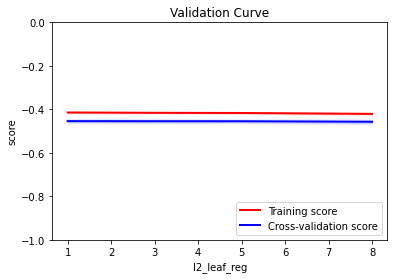

In [68]:
full_information_catboost_plot = GridSearchPlotter(full_information_catboost_grid_pipe.steps[-1][1])
full_information_catboost_plot.plot_validation_curve(parameter='l2_leaf_reg',ylim=(-1,0))

In [69]:
full_information_catboost_grid_pipe.steps[-1][1].best_score_

-0.45383880183986386

In [70]:
full_information_catboost_grid_pipe.steps[-1][1].best_params_

{'l2_leaf_reg': 1}

In [71]:
full_information_catboost_pipe.fit(X_tr,np.log(y_tr))

0:	learn: 0.8314495	total: 680ms	remaining: 1m 7s
1:	learn: 0.8016748	total: 1.27s	remaining: 1m 2s
2:	learn: 0.7774311	total: 1.86s	remaining: 1m
3:	learn: 0.7549796	total: 2.43s	remaining: 58.4s
4:	learn: 0.7358416	total: 3.01s	remaining: 57.2s
5:	learn: 0.7198930	total: 3.58s	remaining: 56.2s
6:	learn: 0.7058020	total: 4.15s	remaining: 55.1s
7:	learn: 0.6921657	total: 4.74s	remaining: 54.6s
8:	learn: 0.6804227	total: 5.31s	remaining: 53.7s
9:	learn: 0.6709621	total: 5.91s	remaining: 53.2s
10:	learn: 0.6624218	total: 6.49s	remaining: 52.5s
11:	learn: 0.6550002	total: 7.07s	remaining: 51.9s
12:	learn: 0.6481225	total: 7.65s	remaining: 51.2s
13:	learn: 0.6422551	total: 8.22s	remaining: 50.5s
14:	learn: 0.6372196	total: 8.81s	remaining: 49.9s
15:	learn: 0.6328979	total: 9.38s	remaining: 49.2s
16:	learn: 0.6287994	total: 9.95s	remaining: 48.6s
17:	learn: 0.6257298	total: 10.5s	remaining: 47.9s
18:	learn: 0.6227171	total: 11.1s	remaining: 47.3s
19:	learn: 0.6190108	total: 11.7s	remaining:

Pipeline(memory=None,
         steps=[('processing',
                 Pipeline(memory=None,
                          steps=[('running_time_imputer',
                                  RunningTimeImputer(number_of_tracks='number_of_tracks',
                                                     running_time='running_time')),
                                 ('record_store_column_remover',
                                  ColumnRemover(cols_to_remove={'country_albania',
                                                                'country_algeria',
                                                                'country_andorra',
                                                                'country_angola',
                                                                'country_argentina',
                                                                'country_armenia',
                                                                '...
                                           

In [ ]:
full_information_catboost_te_pred = full_information_catboost_pipe.predict(X_te)

In [73]:
r2_score(y_te,np.exp(full_information_catboost_te_pred))

0.3944461702713298

In [74]:
mean_absolute_error(y_te,np.exp(full_information_catboost_te_pred))

7.123721140192723

## Identification of Feature Importances

In [ ]:
feature_importance_transformation_pipe = full_information_catboost_processing_pipe.fit(X_tr,np.log(y_tr).values)
full_information_catboost_feature_importances = dict(zip(
    feature_importance_transformation_pipe.transform(X_te).columns,
    full_information_catboost_pipe.steps[-1][-1].feature_importances_
))

In [76]:
pd.Series(full_information_catboost_feature_importances).sort_values(ascending=False).head(20)

community_want                        19.230088
units_for_sale                        15.779837
country                               15.556832
format_name                            9.747956
label                                  6.171569
year                                   5.596909
region_eastern asia                    5.427158
artist                                 3.586493
community_have                         2.929832
superregion_europe                     1.835236
average_rating                         1.459620
format_quantity                        1.370903
master_id                              1.207412
format_text                            1.173255
number_of_tracks                       1.006565
format_description_Limited Edition     0.961755
era_contemporary                       0.776566
format_description_Reissue             0.758808
format_description_Club Edition        0.608544
period_cool                            0.539620
dtype: float64